# Model validation

   
Model Evaluation:
MSE.
RMSE.
MAE.
R2.
Adjusted R2.
Feature Importance.

Model Iteration (Wednesday and Thursday)
Rerun the model after adding the hot encoded categorical variables as well as other numeric categroical variables (e.g. number of open complaintes).


In [172]:
import seaborn as sns
import pandas as pd 
import numpy as np 
url = 'https://raw.githubusercontent.com/repicao/IH_AB_DA_FT_OCT_2023/main/Class_Materials/Case_Studies/Customer_Analysis_Case_Study/Data/Data_Marketing_Customer_Analysis_Round3.csv'
df = pd.read_csv(url)
df = df.dropna()
df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


## x-y split

In [235]:
X = df[['customer_lifetime_value','income','months_since_last_claim',
        'months_since_policy_inception','number_of_policies',
             'number_of_open_complaints']] #all the rest of the numerical columns
y = df[['total_claim_amount']]
X

,customer_lifetime_value,income,months_since_last_claim,months_since_policy_inception,number_of_policies,number_of_open_complaints
0,4809,48029,7,52,9,0
1,2228,92260,3,26,1,0
2,14947,22139,34,31,2,0
3,22332,49078,10,3,2,0
4,9025,23675,33,31,7,0
...,...,...,...,...,...,...
10684,15563,61541,12,40,7,0
10685,5259,61146,7,68,6,0
10686,23893,39837,11,63,2,0
10687,11971,64195,0,27,6,4


## adding the hot encoded categorical variables

In [290]:
df_numerical = df.select_dtypes(include='number')


df_categorical = df[['region','coverage','response','sales_channel',
                     'vehicle_class','vehicle_size','policy_type','gender']]

df_date = df[['effective_to_date']]


In [291]:
df_categorical

,region,coverage,response,sales_channel,vehicle_class,vehicle_size,policy_type,gender
0,central,basic,no,agent,four-door car,medsize,corporate auto,m
1,west region,basic,no,call center,four-door car,medsize,personal auto,f
2,east,basic,no,call center,suv,medsize,personal auto,m
3,north west,extended,yes,branch,four-door car,medsize,corporate auto,m
4,north west,premium,no,branch,four-door car,medsize,personal auto,f
...,...,...,...,...,...,...,...,...
10684,central,premium,no,web,luxury car,medsize,personal auto,f
10685,north west,basic,no,branch,four-door car,medsize,personal auto,f
10686,central,extended,no,web,luxury suv,medsize,corporate auto,f
10687,west region,premium,no,branch,suv,medsize,personal auto,f


In [292]:
#one hot encoding
categorical = pd.get_dummies(df_categorical)
categorical

,region_central,region_east,region_north west,region_west region,coverage_basic,coverage_extended,coverage_premium,response_no,response_yes,sales_channel_agent,...,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_large,vehicle_size_medsize,vehicle_size_small,policy_type_corporate auto,policy_type_personal auto,policy_type_special auto,gender_f,gender_m
0,1,0,0,0,1,0,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
1,0,0,0,1,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
2,0,1,0,0,1,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1
3,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
4,0,0,1,0,0,0,1,1,0,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,1,0,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,1,0,1,0
10685,0,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
10686,1,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
10687,0,0,0,1,0,0,1,1,0,0,...,1,0,0,1,0,0,1,0,1,0


In [293]:
#we glue the categorical with the numerical in X 
new_X = pd.concat([X, categorical],axis=1)
new_X.reset_index(drop=True,inplace=True)
new_X

,customer_lifetime_value,income,months_since_last_claim,months_since_policy_inception,number_of_policies,number_of_open_complaints,region_central,region_east,region_north west,region_west region,...,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_large,vehicle_size_medsize,vehicle_size_small,policy_type_corporate auto,policy_type_personal auto,policy_type_special auto,gender_f,gender_m
0,4809,48029,7,52,9,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,2228,92260,3,26,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
2,14947,22139,34,31,2,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1
3,22332,49078,10,3,2,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
4,9025,23675,33,31,7,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,15563,61541,12,40,7,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
10685,5259,61146,7,68,6,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
10686,23893,39837,11,63,2,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
10687,11971,64195,0,27,6,4,0,0,0,1,...,1,0,0,1,0,0,1,0,1,0


In [332]:
#ordinal encoding
df['education'].unique()

array(['college', 'bachelor', 'high school or below', 'doctor', 'master'],
      dtype=object)

In [337]:

from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder(categories = [['high school or below','college','bachelor','master','doctor']])



encoded_data = enc.fit_transform(df[['education']])


df['education'] = encoded_data


ValueError: could not convert string to float: 'high school or below'

## Train-test split

In [294]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_X,y,test_size = 0.25, random_state = 100)

In [295]:
y_train

,total_claim_amount
5869,886
5467,37
1322,326
9921,155
9140,699
...,...
350,246
79,89
8039,314
6936,64


In [296]:
X_train

,customer_lifetime_value,income,months_since_last_claim,months_since_policy_inception,number_of_policies,number_of_open_complaints,region_central,region_east,region_north west,region_west region,...,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_large,vehicle_size_medsize,vehicle_size_small,policy_type_corporate auto,policy_type_personal auto,policy_type_special auto,gender_f,gender_m
5869,9486,25322,23,52,3,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1
5467,7762,23827,18,77,3,2,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
1322,7806,23706,1,56,2,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
9921,8810,76266,24,88,3,1,1,0,0,0,...,0,1,0,1,0,0,1,0,1,0
9140,7996,70061,2,57,3,0,0,0,0,1,...,0,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,2476,47918,2,51,1,0,0,1,0,0,...,0,1,0,1,0,1,0,0,1,0
79,9312,75986,11,44,3,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
8039,6945,15850,28,14,2,0,0,0,1,0,...,0,1,0,1,0,1,0,0,1,0
6936,8718,89096,1,50,3,0,0,0,1,0,...,1,0,1,0,0,0,1,0,0,1


## Standardize the data (after the data split!).

In [297]:
from sklearn.preprocessing import StandardScaler

In [298]:
scaler = StandardScaler()

#fit and scale


X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled



#scaler.fit(X_train)
#scaler.trasnsform(X_test)

,customer_lifetime_value,income,months_since_last_claim,months_since_policy_inception,number_of_policies,number_of_open_complaints,region_central,region_east,region_north west,region_west region,...,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_large,vehicle_size_medsize,vehicle_size_small,policy_type_corporate auto,policy_type_personal auto,policy_type_special auto,gender_f,gender_m
0,0.208233,-1.080264,0.775438,0.133066,0.006997,-0.425585,-0.637816,-0.311256,-0.623710,1.385720,...,-0.500741,-0.502104,-0.342818,0.645178,-0.482350,1.916071,-1.713806,-0.203912,-1.017874,1.017874
1,-0.039727,-1.140466,0.281327,1.029148,0.006997,1.753584,-0.637816,-0.311256,-0.623710,1.385720,...,-0.500741,-0.502104,-0.342818,0.645178,-0.482350,-0.521901,0.583497,-0.203912,0.982440,-0.982440
2,-0.033399,-1.145338,-1.398648,0.276439,-0.408472,0.664000,-0.637816,-0.311256,1.603309,-0.721647,...,-0.500741,-0.502104,-0.342818,0.645178,-0.482350,1.916071,-1.713806,-0.203912,-1.017874,1.017874
3,0.111005,0.971172,0.874260,1.423424,0.006997,0.664000,1.567850,-0.311256,-0.623710,-0.721647,...,-0.500741,1.991618,-0.342818,0.645178,-0.482350,-0.521901,0.583497,-0.203912,0.982440,-0.982440
4,-0.006071,0.721306,-1.299826,0.312283,0.006997,-0.425585,-0.637816,-0.311256,-0.623710,1.385720,...,-0.500741,-0.502104,-0.342818,-1.549960,2.073182,1.916071,-1.713806,-0.203912,0.982440,-0.982440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8011,-0.800005,-0.170358,-1.299826,0.097223,-0.823941,-0.425585,-0.637816,3.212792,-0.623710,-0.721647,...,-0.500741,1.991618,-0.342818,0.645178,-0.482350,1.916071,-1.713806,-0.203912,0.982440,-0.982440
8012,0.183207,0.959897,-0.410427,-0.153680,0.006997,-0.425585,1.567850,-0.311256,-0.623710,-0.721647,...,-0.500741,-0.502104,-0.342818,0.645178,-0.482350,-0.521901,0.583497,-0.203912,-1.017874,1.017874
8013,-0.157235,-1.461687,1.269548,-1.228978,-0.408472,-0.425585,-0.637816,-0.311256,1.603309,-0.721647,...,-0.500741,1.991618,-0.342818,0.645178,-0.482350,1.916071,-1.713806,-0.203912,0.982440,-0.982440
8014,0.097773,1.487817,-1.398648,0.061380,0.006997,-0.425585,-0.637816,-0.311256,1.603309,-0.721647,...,1.997042,-0.502104,2.917001,-1.549960,-0.482350,-0.521901,0.583497,-0.203912,-1.017874,1.017874


In [299]:
#we only scale the X_test, we dont fit them! 

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns)
X_test_scaled


,customer_lifetime_value,income,months_since_last_claim,months_since_policy_inception,number_of_policies,number_of_open_complaints,region_central,region_east,region_north west,region_west region,...,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_large,vehicle_size_medsize,vehicle_size_small,policy_type_corporate auto,policy_type_personal auto,policy_type_special auto,gender_f,gender_m
0,-0.769226,0.318581,0.874260,-1.300665,-0.823941,-0.425585,1.567850,-0.311256,-0.623710,-0.721647,...,-0.500741,-0.502104,-0.342818,0.645178,-0.482350,-0.521901,0.583497,-0.203912,0.982440,-0.982440
1,0.372485,1.559414,0.281327,-0.727172,0.006997,3.932754,-0.637816,-0.311256,-0.623710,1.385720,...,1.997042,-0.502104,-0.342818,0.645178,-0.482350,-0.521901,0.583497,-0.203912,-1.017874,1.017874
2,0.175584,1.608380,-0.410427,1.351738,0.006997,-0.425585,-0.637816,-0.311256,1.603309,-0.721647,...,1.997042,-0.502104,-0.342818,-1.549960,2.073182,-0.521901,-1.713806,4.904080,-1.017874,1.017874
3,0.194138,-0.746962,0.775438,-0.619642,-0.408472,-0.425585,-0.637816,-0.311256,-0.623710,1.385720,...,-0.500741,-0.502104,-0.342818,-1.549960,2.073182,-0.521901,0.583497,-0.203912,0.982440,-0.982440
4,0.290216,-1.451741,-0.805715,-1.515724,1.668873,-0.425585,1.567850,-0.311256,-0.623710,-0.721647,...,-0.500741,-0.502104,-0.342818,0.645178,-0.482350,-0.521901,0.583497,-0.203912,-1.017874,1.017874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2668,-0.021173,-0.955432,-0.509249,0.527342,-0.408472,-0.425585,-0.637816,-0.311256,1.603309,-0.721647,...,-0.500741,-0.502104,2.917001,-1.549960,-0.482350,1.916071,-1.713806,-0.203912,-1.017874,1.017874
2669,-0.533347,0.335293,-0.608071,-1.085605,-0.823941,-0.425585,-0.637816,-0.311256,-0.623710,1.385720,...,-0.500741,-0.502104,-0.342818,0.645178,-0.482350,-0.521901,0.583497,-0.203912,-1.017874,1.017874
2670,-0.626979,0.348541,0.083683,0.061380,-0.823941,-0.425585,-0.637816,3.212792,-0.623710,-0.721647,...,-0.500741,-0.502104,-0.342818,0.645178,-0.482350,-0.521901,0.583497,-0.203912,-1.017874,1.017874
2671,-0.296174,0.223266,0.083683,0.276439,0.006997,-0.425585,-0.637816,-0.311256,-0.623710,1.385720,...,-0.500741,-0.502104,-0.342818,0.645178,-0.482350,-0.521901,0.583497,-0.203912,0.982440,-0.982440


#fit the y_train
y_fitted = scaler.fit(y_train)

#scale 
y_train_scaled = scaler.fit_transform(y_train)

y_train_scaled = pd.DataFrame(y_train_scaled,columns = y_train.columns)
y_train_scaled

## create new model

In [300]:
from sklearn.linear_model import LinearRegression

In [301]:
lm = LinearRegression()

In [302]:
model = lm.fit(X_train_scaled, y_train)

In [303]:
model.coef_

array([[ 5.82337626e+00, -3.29015947e+01,  4.04789468e+00,
         1.01982789e-01, -1.17207007e+00, -3.81754448e+00,
         2.65290150e+14,  1.66042432e+14,  2.62746475e+14,
         2.77664828e+14,  8.39864047e+12,  7.89608834e+12,
         4.86240375e+12,  1.84724404e+14,  1.84724404e+14,
        -1.82624486e+15, -1.69560152e+15, -1.48967576e+15,
        -1.34495522e+15, -7.54547769e+14, -2.05849413e+14,
        -2.09141181e+14, -3.35918684e+14, -6.04239567e+14,
        -6.05223365e+14,  1.34599502e+14,  1.99882654e+14,
         1.71694186e+14,  3.29974753e+14,  3.50179949e+14,
         1.57492296e+14, -6.21074563e+15, -6.21074563e+15]])

In [304]:
model.intercept_

array([435.10542168])

## Predict

## create the y_pred

In [305]:
y_pred = model.predict(X_test_scaled)

In [306]:
y_test.shape

(2673, 1)

In [307]:
np.array(y_test)

array([[320],
       [459],
       [ 22],
       ...,
       [213],
       [547],
       [307]])

## real_vs_pred

In [308]:
real_vs_pred = pd.DataFrame({'y_test': y_test["total_claim_amount"], 'y_pred':y_pred[:,0]})

In [309]:
real_vs_pred

,y_test,y_pred
9700,320,262.105422
4662,459,558.105422
1401,22,643.105422
6313,111,450.105422
8906,1000,655.105422
...,...,...
8832,453,354.105422
2498,513,568.105422
10126,213,435.105422
9257,547,366.105422


## Compute the MSE

In [310]:
from sklearn.metrics import mean_squared_error as mse

In [311]:
mse(real_vs_pred['y_test'], real_vs_pred['y_pred'])

50742.66390892601

## RMSE

In [312]:
import numpy as np 
np.sqrt(mse(real_vs_pred['y_test'], real_vs_pred['y_pred']))

225.26132359756303

In [313]:
y_test

,total_claim_amount
9700,320
4662,459
1401,22
6313,111
8906,1000
...,...
8832,453
2498,513
10126,213
9257,547


## Linear Regression using statsmodels

In [314]:
import statsmodels.api as sm 

In [315]:
X_train_const = sm.add_constant(X_train.to_numpy())

model_1 = sm.OLS(y_train, X_train_const).fit()
predictions_train = model_1.predict(X_train_const)

X_test_const = sm.add_constant(X_test)
y_pred = model_1.predict(X_test_const)
print_model = model_1.summary()
print_model #this is for the X_train

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_claim_amount   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     193.5
Date:                Wed, 08 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:31:36   Log-Likelihood:                -55029.
No. Observations:                8016   AIC:                         1.101e+05
Df Residuals:                    7990   BIC:                         1.103e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        218.2090      3.496     62.419      0.000     211.356     225.062
x1             0.0008      0.000      2.088      0.037    5.17e-05       0.002
x2            -0.0013      0.000    -12.597      0.000      -0.002      -0.001
x3             0.3797      0.257      1.477      0.140      -0.124       0.884
x4            -0.0270      0.093     -0.290      0.772      -0.210       0.156
x5             0.5801      1.079      0.537      0.591      -1.536       2.696
x6            -2.2290      2.833     -0.787      0.431      -7.782       3.323
x7            48.6521      4.565     10.658      0.000      39.704      57.601
x8            63.6573      7.043      9.039      0.000      49.852      77.463
x9            50.7224      4.616     10.989      0.000      41.674      59.770
x10           55.1771      4.356     12.666      0.000      46.638      63.716
x11          -49.7876      3.945    -12.620      0.000     -57.521     -42.054
x12           53.4360      4.509     11.851      0.000      44.597      62.275
x13          214.5605      6.588     32.568      0.000     201.646     227.475
x14          105.5009      3.986     26.465      0.000      97.686     113.315
x15          112.7081      4.506     25.015      0.000     103.876     121.540
x16           54.4389      4.106     13.260      0.000      46.391      62.487
x17           48.1832      4.484     10.745      0.000      39.393      56.973
x18           57.1053      5.135     11.120      0.000      47.039      67.172
x19           58.4815      5.611     10.423      0.000      47.483      69.480
x20         -260.9229      5.904    -44.197      0.000    -272.495    -249.350
x21          464.7414     16.473     28.213      0.000     432.451     497.032
x22          391.9551     16.253     24.116      0.000     360.095     423.815
x23          -58.7161     10.551     -5.565      0.000     -79.398     -38.034
x24          -56.4999      6.798     -8.311      0.000     -69.826     -43.174
x25         -262.3486      6.975    -37.612      0.000    -276.022    -248.676
x26           60.1934      6.027      9.988      0.000      48.380      72.007
x27           47.0463      3.891     12.092      0.000      39.420      54.673
x28          110.9693      5.064     21.914      0.000     101.043     120.896
x29           65.5333      5.736     11.426      0.000      54.290      76.776
x30           71.4546      4.897     14.590      0.000      61.854      81.055
x31           81.2211      9.331      8.704      0.000      62.929      99.513
x32           88.2143      3.121     28.268      0.000      82.097      94.332
x33          129.9946      3.149     41.288      0.000     123.823     136.167
==============================================================================
Omnibus:                     1261.873   Durbin-Watson:                   2.016
Pr

## Plots

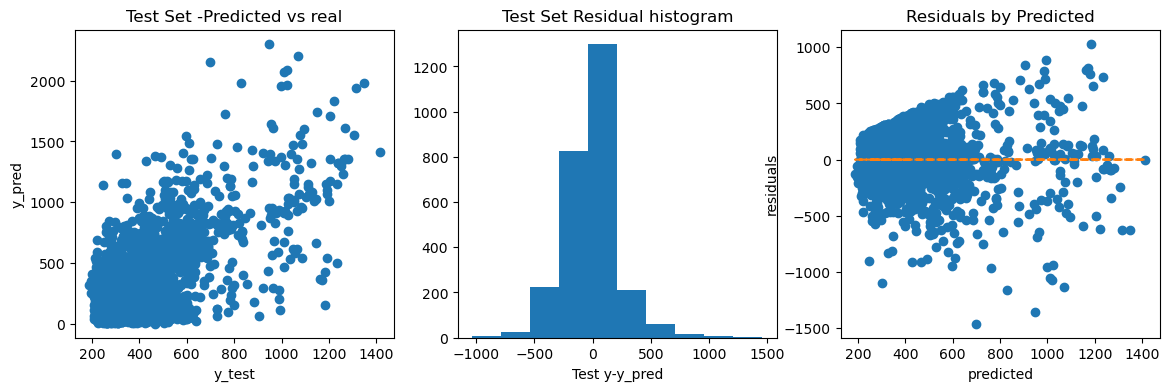

In [316]:
## Plot y_pred vs y_test
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test['total_claim_amount'], 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.
# Does it ressemble a normal distribution?
ax[1].hist(y_test['total_claim_amount'] - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

# Homoscedasticity
ax[2].plot(y_pred,np.array(y_pred)-np.array(y_test['total_claim_amount']),"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

## MAE 

In [317]:
from sklearn.metrics import mean_absolute_error as mae 

In [318]:
error = mae(y_test, y_pred) 
error

155.31616193382214

## R2

In [319]:
#we calculate not the X_test and we can compaire it with X_train
from sklearn.metrics import r2_score 

In [320]:
R_square = r2_score(y_test, y_pred)
R_square

0.3930252488917062

## Plot feature importances

In [321]:
coefficients = model.coef_

coefficients.shape

(1, 33)

In [322]:
np.array(coefficients)

array([[ 5.82337626e+00, -3.29015947e+01,  4.04789468e+00,
         1.01982789e-01, -1.17207007e+00, -3.81754448e+00,
         2.65290150e+14,  1.66042432e+14,  2.62746475e+14,
         2.77664828e+14,  8.39864047e+12,  7.89608834e+12,
         4.86240375e+12,  1.84724404e+14,  1.84724404e+14,
        -1.82624486e+15, -1.69560152e+15, -1.48967576e+15,
        -1.34495522e+15, -7.54547769e+14, -2.05849413e+14,
        -2.09141181e+14, -3.35918684e+14, -6.04239567e+14,
        -6.05223365e+14,  1.34599502e+14,  1.99882654e+14,
         1.71694186e+14,  3.29974753e+14,  3.50179949e+14,
         1.57492296e+14, -6.21074563e+15, -6.21074563e+15]])

In [323]:
feature_importances = pd.DataFrame({'variable':X.columns, 'coefficient':coefficients [:,0]})  

ValueError: All arrays must be of the same length

In [289]:
sns.barplot(x=feature_importances['variable'], y=feature_importances['coefficient'])


NameError: name 'feature_importances' is not defined